## Test ML models
### h2o.ai
Transform netCDF serialized files to h2o dataframes via xarray and pandas.

In [1]:
import h2o
import xarray as xr
import pandas as pd

In [ ]:
# Open the training dataset (Saldana S2 data from late-2015 to jan-2016)
# data variable phc is phenology class
sat_data_again = xr.open_dataset('/home/azalazar/data/training_data/s2phc.nc')
sat_data_again

In [3]:
# Initialize h2o cluster
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/azalazar/anaconda2/envs/models/h2o_jar/h2o.jar
  Ice root: /tmp/tmpCFXVNC
  JVM stdout: /tmp/tmpCFXVNC/h2o_azalazar_started_from_python.out
  JVM stderr: /tmp/tmpCFXVNC/h2o_azalazar_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,1 month and 28 days
H2O cluster name:,H2O_from_python_azalazar_k1044x
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,24
H2O cluster allowed cores:,24
H2O cluster status:,"accepting new members, healthy"


In [38]:
# Inspect input data
sat_data_again

<xarray.Dataset>
Dimensions:   (time: 4, x: 2979, y: 3631)
Coordinates:
  * x         (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * y         (y) float64 4.485e+05 4.484e+05 4.484e+05 4.484e+05 4.484e+05 ...
  * time      (time) datetime64[ns] 2015-12-22 2015-12-31 2016-01-11 2016-01-21
    mask      (time, x, y) bool ...
Data variables:
    blue      (time, x, y) float64 ...
    swir1     (time, x, y) float64 ...
    swir2     (time, x, y) float64 ...
    qa_class  (time, x, y) float64 ...
    qa_cloud  (time, x, y) float64 ...
    green     (time, x, y) float64 ...
    nir       (time, x, y) float64 ...
    NDVI      (time, x, y) float32 ...
    LSWI      (time, x, y) float32 ...
    red       (time, x, y) float64 ...
    phc       (time, x, y) float64 ...

In [40]:
# Select only data from a date and transform to pandas dataframe
data_pd = sat_data_again.sel(time='2016-01-21').drop('time').to_dataframe()
# Leave only data with class
data_pd_v1 = data_pd.loc[data_pd['phc'] > 0]
# Remove not valid data (cloudy pixels)
data_pd_v2 = data_pd_v1.loc[data_pd_v1['mask'] == True]

In [41]:
# Inspect dataframe
data_pd_v2

blue   swir1   swir2  qa_class  qa_cloud   green     nir  \
x        y                                                                      
499455.0 425215.0  1100.0  2441.0  1405.0      10.0       1.0  1280.0  3223.0   
         425205.0  1065.0  2441.0  1405.0      10.0       1.0  1268.0  3223.0   
         425195.0  1032.0  2562.0  1519.0      10.0       0.0  1334.0  3184.0   
499465.0 425245.0  1119.0  2471.0  1396.0      10.0       1.0  1337.0  3505.0   
         425195.0  1022.0  2404.0  1385.0      10.0       1.0  1374.0  3239.0   
         425185.0  1062.0  2404.0  1385.0      10.0       1.0  1424.0  3268.0   
499475.0 425265.0  1163.0  2502.0  1418.0      10.0       1.0  1301.0  3204.0   
         425255.0  1160.0  2471.0  1396.0      10.0       1.0  1398.0  3353.0   
         425245.0  1209.0  2471.0  1396.0      10.0       1.0  1438.0  3524.0   
         425195.0  1049.0  2404.0  1385.0      10.0       1.0  1379.0  3332.0   
         425185.0  1043.0  2404.0  1385.0      10.0       1.0  1379.0  3228.0   
499485.0 425285.0  1147.0  3018.0  1842.0      10.0       0.0  1410.0  3412.0   
         425275.0  1171.0  2495.0  1442.0      10.0       0.0  1372.0  3316.0   
         425265.0  1161.0  2495.0  1442.0      10.0       0.0  1354.0  3179.0   
         425255.0  1152.0  2444.0  1403.0      10.0       0.0  1349.0  3160.0   
         425245.0  1231.0  2444.0  1403.0      10.0       0.0  1481.0  3540.0   
         425235.0  1195.0  2521.0  1415.0      10.0       1.0  1471.0  3521.0   
         425225.0  1104.0  2521.0  1415.0      10.0       1.0  1401.0  3414.0   
         425215.0  1106.0  2449.0  1372.0      10.0       1.0  1410.0  3447.0   
         425205.0  1003.0  2449.0  1372.0      10.0       1.0  1382.0  3398.0   
         425195.0  1006.0  2415.0  1372.0      10.0       1.0  1344.0  3414.0   
         425185.0   998.0  2415.0  1372.0      10.0       1.0  1386.0  3255.0   
         425175.0  1060.0  2714.0  1600.0      10.0       0.0  1481.0  3144.0   
499495.0 425305.0  1320.0  3299.0  2020.0      10.0       0.0  1605.0  3418.0   
         425295.0  1293.0  3018.0  1842.0      10.0       0.0  1556.0  3414.0   
         425285.0  1212.0  3018.0  1842.0      10.0       0.0  1504.0  3325.0   
         425275.0  1185.0  2495.0  1442.0      10.0       0.0  1413.0  3199.0   
         425265.0  1128.0  2495.0  1442.0      10.0       0.0  1373.0  2982.0   
         425255.0  1128.0  2444.0  1403.0      10.0       0.0  1302.0  3035.0   
         425245.0  1166.0  2444.0  1403.0      10.0       0.0  1441.0  3346.0   
...                   ...     ...     ...       ...       ...     ...     ...   
503815.0 433835.0  1028.0  2076.0  1222.0      10.0       1.0  1319.0  3186.0   
         433825.0  1054.0  2076.0  1222.0      10.0       1.0  1323.0  3239.0   
         433775.0  1003.0  1996.0  1158.0      10.0       2.0  1290.0  2991.0   
         433765.0  1054.0  1996.0  1158.0      10.0       2.0  1294.0  2979.0   
         433755.0  1078.0  1963.0  1153.0      10.0       6.0  1294.0  2936.0   
         433745.0  1019.0  1963.0  1153.0      10.0       6.0  1313.0  2927.0   
         433735.0  1053.0  1962.0  1144.0      10.0       5.0  1294.0  2921.0   
         433725.0  1048.0  1962.0  1144.0      10.0       5.0  1307.0  2901.0   
503825.0 433775.0  1006.0  1981.0  1163.0      10.0       2.0  1272.0  2935.0   
         433765.0  1017.0  1981.0  1163.0      10.0       2.0  1302.0  2969.0   
         433755.0   998.0  1961.0  1158.0      10.0       3.0  1299.0  2973.0   
         433745.0  1011.0  1961.0  1158.0      10.0       3.0  1287.0  3034.0   
         433735.0  1059.0  1966.0  1153.0      10.0       2.0  1310.0  3037.0   
         433725.0  1029.0  1966.0  1153.0      10.0       2.0  1287.0  2982.0   
503835.0 433775.0   969.0  1981.0  1163.0      10.0       2.0  1263.0  3053.0   
         433765.0  1017.0  1981.0  1163.0      10.0       2.0  1326.0  3029.0   
         433755.0  1036.0  1961.0  1158.0      10.0 

In [42]:
# Remove multi-index, as it is not preserved in h20
data_pd_v2.reset_index(inplace=True)

In [43]:
# Load data to h2o frame
data = h2o.H2OFrame(data_pd_v2)  # 3764 rows x 14 columns
data.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(3764, 14)

In [44]:
data['phc'] = data['phc'].asfactor()  #encode the class response as a factor
data['phc'].levels()  #after encoding, this shows the 5 factor levels, in this dataset '2' is missing!!!

[['1', '3', '4', '5']]

In [46]:
# To train and test the model using only this data, split data
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)
train = splits[0]
valid = splits[1]
test = splits[2]

In [47]:
# Show number of observations from each dataset
print train.nrow
print valid.nrow
print test.nrow

2651
548
565


In [48]:
# Define response variables and predictors
y = 'phc'
x = list(data.columns)

In [51]:
# Show predictors
x

[u'blue', u'swir1', u'swir2', u'green', u'nir', u'NDVI', u'LSWI', u'red']

In [50]:
x.remove(y)  #remove the response
x.remove('x')
x.remove('y')
x.remove('mask')
x.remove('qa_class')
x.remove('qa_cloud') #remove cloud mask

In [52]:
# test random forest
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [53]:
# Initialize model
rf_v1 = H2ORandomForestEstimator(
    model_id="rf_covType_v1",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=1000000)

In [54]:
# Train model
rf_v1.train(x, y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [55]:
# Print model details
rf_v1

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_covType_v1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0059990888702
RMSE: 0.0774537853833
LogLoss: 0.151238859199
Mean Per-Class Error: 0.00601267463862
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,3,4,5,Error,Rate
451.0,0.0,0.0,0.0,0.0,0 / 451
0.0,699.0,2.0,2.0,0.0056899,4 / 703
0.0,1.0,647.0,3.0,0.0061444,4 / 651
0.0,5.0,2.0,566.0,0.0122164,7 / 573
451.0,705.0,651.0,571.0,0.0063078,"15 / 2,378"


Top-4 Hit Ratios: 


k,hit_ratio
1,0.9936922
2,0.9962153
3,0.9962153
4,1.0



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.00344776718473
RMSE: 0.0587176905603
LogLoss: 0.013506267919
Mean Per-Class Error: 0.00208333333333
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,3,4,5,Error,Rate
123.0,0.0,0.0,0.0,0.0,0 / 123
0.0,157.0,0.0,0.0,0.0,0 / 157
0.0,0.0,148.0,0.0,0.0,0 / 148
0.0,1.0,0.0,119.0,0.0083333,1 / 120
123.0,158.0,148.0,119.0,0.0018248,1 / 548


Top-4 Hit Ratios: 


k,hit_ratio
1,0.9981752
2,1.0
3,1.0
4,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-05-04 10:48:47,0.013 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-05-04 10:48:47,0.040 sec,1.0,0.1207703,0.4631216,0.0102354,0.1024339,0.3189294,0.0109489
,2018-05-04 10:48:47,0.060 sec,2.0,0.1071070,0.3525185,0.0107188,0.0648631,0.0122435,0.0091241
,2018-05-04 10:48:47,0.077 sec,3.0,0.1000751,0.3145317,0.0095143,0.0614562,0.0118861,0.0054745
,2018-05-04 10:48:47,0.094 sec,4.0,0.0788451,0.1596244,0.0062444,0.0588567,0.0129572,0.0018248
,2018-05-04 10:48:47,0.121 sec,5.0,0.0774538,0.1512389,0.0063078,0.0587177,0.0135063,0.0018248


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
NDVI,1755.6030273,1.0,0.2113329
swir1,1584.4270019,0.9024973,0.1907274
blue,1571.0600586,0.8948834,0.1891183
red,1294.0904541,0.7371202,0.1557778
green,1104.8917236,0.6293517,0.1330027
swir2,588.5809326,0.3352586,0.0708512
LSWI,307.3491516,0.1750676,0.0369975
nir,101.2843399,0.0576921,0.0121922


In [56]:
# Predict using test data
final_rf_predictions = rf_v1.predict(test[:-1])

drf prediction progress: |████████████████████████████████████████████████| 100%


In [57]:
# Get test data accuracy
(final_rf_predictions['predict']==test['phc']).as_data_frame(use_pandas=True).mean()

predict    0.99115
dtype: float64

In [85]:
# Shape of test data predictions
final_rf_predictions.as_data_frame().shape

In [59]:
final_rf_predictions['predict'].as_data_frame().shape

(565, 1)

In [60]:
resulting_class_df = test.as_data_frame().join(final_rf_predictions['predict'].as_data_frame())

In [61]:
# Create MultiIndex from coordinates ## TODO include time!
resulting_class_df.set_index(['x', 'y'], inplace=True)

In [62]:
resulting_class_df.shape

(565, 13)

In [64]:
# Test if duplicates (there shouldnt be!)
remove_duplicates = resulting_class_df[~resulting_class_df.index.duplicated(keep='first')]
remove_duplicates.shape

(565, 13)

In [65]:
# Return to xarray
xarr = xr.Dataset.from_dataframe(resulting_class_df)

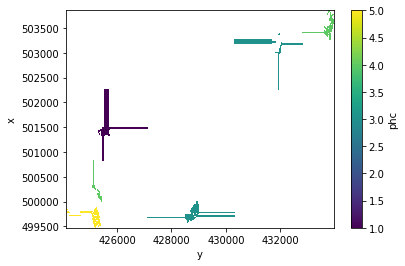

In [73]:
# Plot phenology class from test data. WHY IS IT LIKE THAT?!
xarr['phc'].plot()

In [70]:
# Prepare to compare initial with prediction
original = sat_data_again['phc'].sel(time='2016-01-21').drop('time').drop('mask')
predicted = xarr['predict']

In [79]:
# Concatenate into one xarray
dimnames = xr.Variable('band', pd.Index(['phc', 'predict']))
da = xr.concat([original.where(original>0), predicted], dimnames)

In [81]:
da

<xarray.DataArray 'phc' (band: 2, x: 2979, y: 3631)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * y        (y) float64 4.122e+05 4.122e+05 4.122e+05 4.122e+05 4.122e+05 ...
  * x        (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * band     (band) object 'phc' 'predict'

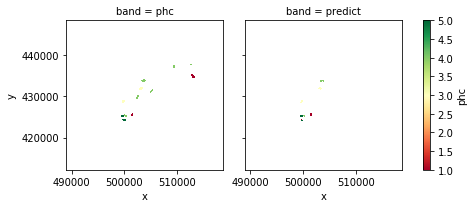

In [80]:
# Plot
da.plot(x='x', y='y', col='band', vmin=1., vmax=5., cmap='RdYlGn')

In [74]:
# Test merging into dataset
merged = xr.merge([original, predicted])

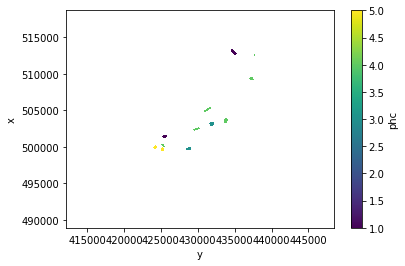

In [78]:
merged['phc'].where(merged['phc']>0).plot()

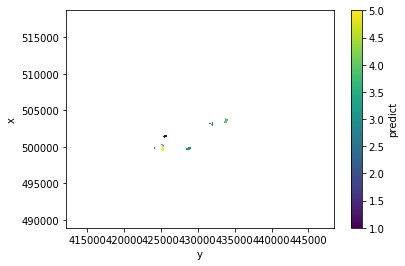

In [76]:
merged['predict'].plot()

In [83]:
# Close h2o cluster
h2o.cluster().shutdown(prompt=False)

## Rest of h2o.ai tutorial

In [25]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [26]:
# Initialize the RF estimator:

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)

In [27]:
rf_fit1.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [28]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=100, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)

In [30]:
print rf_perf1.auc()
print rf_perf2.auc()

0.663462768485
0.669287987873


In [31]:
rf_fit3 = H2ORandomForestEstimator(model_id='rf_fit3', seed=1, nfolds=5)
rf_fit3.train(x=x, y=y, training_frame=data)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [32]:
print rf_fit3.auc(xval=True)

0.663606041745


In [33]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [34]:
# Initialize and train the GBM estimator:

gbm_fit1 = H2OGradientBoostingEstimator(model_id='gbm_fit1', seed=1)
gbm_fit1.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [35]:
gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2', ntrees=500, seed=1)
gbm_fit2.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [36]:
gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [37]:
gbm_perf1 = gbm_fit1.model_performance(test)
gbm_perf2 = gbm_fit2.model_performance(test)
gbm_perf3 = gbm_fit3.model_performance(test)

In [38]:
# Retreive test set AUC
print gbm_perf1.auc()
print gbm_perf2.auc()
print gbm_perf3.auc()

0.683883128672
0.684086466361
0.684443511563


In [39]:
gbm_fit2.scoring_history()

Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-25 08:45:40,0.028 sec,0.0,0.3856346,0.4740298,0.5,1.0,0.8182546
,2018-04-25 08:45:40,0.128 sec,1.0,0.3837005,0.4691294,0.6577912,2.6832997,0.4006858
,2018-04-25 08:45:40,0.174 sec,2.0,0.3820620,0.4651166,0.6658294,2.7939915,0.3332492
,2018-04-25 08:45:40,0.221 sec,3.0,0.3806936,0.4618385,0.6685103,2.9710023,0.3447454
,2018-04-25 08:45:40,0.276 sec,4.0,0.3795380,0.4591170,0.6701132,2.9754401,0.3318046
---,---,---,---,---,---,---,---,---
,2018-04-25 08:45:43,3.795 sec,43.0,0.3677312,0.4317210,0.7124068,3.6410228,0.2975859
,2018-04-25 08:45:43,3.888 sec,44.0,0.3676187,0.4314625,0.7129225,3.6553764,0.3021722
,2018-04-25 08:45:44,3.989 sec,45.0,0.3674805,0.4311606,0.7134660,3.6649454,0.3023984
,2018-04-25 08:45:48,7.995 sec,226.0,0.3612902,0.4176954,0.7402357,4.2582264,0.2599471


In [40]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [41]:
dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', seed=1)
dl_fit1.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [42]:
dl_fit2 = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=20, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl_fit2.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
dl_fit3 = H2ODeepLearningEstimator(model_id='dl_fit3', 
                                   epochs=20, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [44]:
dl_perf1 = dl_fit1.model_performance(test)
dl_perf2 = dl_fit2.model_performance(test)
dl_perf3 = dl_fit3.model_performance(test)

In [45]:
# Retreive test set AUC
print dl_perf1.auc()
print dl_perf2.auc()
print dl_perf3.auc()

0.686254936726
0.681516110354
0.681802966019


In [47]:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
nb_fit1 = H2ONaiveBayesEstimator(model_id='nb_fit1')
nb_fit1.train(x=x, y=y, training_frame=train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [48]:
nb_fit2 = H2ONaiveBayesEstimator(model_id='nb_fit2', laplace=6)
nb_fit2.train(x=x, y=y, training_frame=train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [49]:
nb_perf1 = nb_fit1.model_performance(test)
nb_perf2 = nb_fit2.model_performance(test)

In [50]:
# Retreive test set AUC
print nb_perf1.auc()
print nb_perf2.auc()

0.651337099516
0.651391851824
